In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only run once

os.chdir('..')

basepath = os.getcwd()

data_train = pd.read_csv(basepath + '/data/train.csv')
data_test = pd.read_csv(basepath + '/data/test.csv')

print(f"Training set shape: {data_train.shape}\n")
print(f"Test set shape: {data_test.shape}\n")

Training set shape: (7613, 5)

Test set shape: (3263, 4)



In [3]:
display(data_train.head())
data_train.info()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
data_train.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [5]:
data_key = data_train[data_train.keyword.isna() == False]

In [6]:
data_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7552 entries, 31 to 7582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7552 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7552 non-null   object
 4   target    7552 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.0+ KB


## Target variable - disaster tweets

In [7]:
data_key_yes = data_key.loc[data_key.target == 1]
data_key_yes

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1
...,...,...,...,...,...
7542,10783,wreckage,"Xi'an, China",Wreckage 'conclusively confirmed' as from miss...,1
7543,10784,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,1
7552,10795,wrecked,"Santa Cruz, CA",Israel wrecked my home. Now it wants my land. ...,1
7559,10808,wrecked,NaN,300K exotic car wrecked in train accident \nht...,1


In [8]:
data_key_yes.keyword.value_counts()[:50]

derailment               39
wreckage                 39
outbreak                 39
debris                   37
oil%20spill              37
typhoon                  37
evacuated                32
suicide%20bombing        32
rescuers                 32
suicide%20bomb           32
nuclear%20disaster       31
razed                    31
suicide%20bomber         30
earthquake               30
airplane%20accident      30
collision                29
wildfire                 29
bridge%20collapse        29
evacuation               28
buildings%20on%20fire    28
mass%20murder            28
casualties               28
sandstorm                28
drought                  28
forest%20fires           27
devastation              27
hostages                 27
bombing                  27
wild%20fires             27
sinkhole                 27
famine                   26
thunderstorm             26
fatal                    26
displaced                26
derailed                 26
fatalities          

In [9]:
data_key_yes.location.value_counts()[:50]

USA                            67
United States                  27
Nigeria                        22
India                          20
Mumbai                         19
UK                             16
London                         16
New York                       16
Washington, DC                 15
Canada                         13
Worldwide                      12
Washington, D.C.                9
Chicago, IL                     9
Australia                       9
Indonesia                       8
Los Angeles, CA                 8
California, USA                 8
Earth                           8
California                      7
New York, NY                    7
Nashville, TN                   7
Toronto                         7
Los Angeles                     7
San Francisco, CA               7
Sacramento, CA                  7
San Francisco                   6
Denver, Colorado                6
New York City                   6
US                              6
Ireland       

## Target variable - Non-disaster tweets

In [10]:
data_key_no = data_key.loc[data_key.target == 0]
data_key_no

,id,keyword,location,text,target
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0


In [11]:
data_key_no.keyword.value_counts()[:50]

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
explode        35
twister        35
fear           35
siren          35
aftershock     34
panic          34
screaming      34
blizzard       33
blazing        33
blaze          33
crush          33
sinking        33
traumatised    33
curfew         32
upheaval       32
bloody         32
body%20bag     32
hellfire       32
smoke          31
electrocute    31
blew%20up      31
collide        31
panicking      31
sunk           30
wreck          30
blight         30
screamed       30
stretcher      30
blood          30
bleeding       30
screams        30
desolation     29
demolish       29
quarantine     29
drown          29
inundated      29
lava           29
pandemonium    29
flattened      29
army           29
catastrophe    29
meltdown       28
destruction    28
destroy        28
Name: keyword, dtype: int64

In [12]:
data_key_no.location.value_counts()[:50]

New York                          55
USA                               37
London                            29
United States                     23
Los Angeles, CA                   18
Canada                            16
Kenya                             15
Everywhere                        12
Florida                           11
UK                                11
California                        10
NYC                               10
United Kingdom                    10
ss                                 9
London, England                    9
Australia                          9
Chicago, IL                        9
304                                9
San Francisco                      8
New York, NY                       8
Texas                              7
Pennsylvania, USA                  7
Manchester                         7
Chicago                            7
California, USA                    7
Seattle                            7
Worldwide                          7
W

## Text cleaning

In [13]:
import nltk
import re
from unidecode import unidecode

In [14]:
regxcache={
# precompile regular expressions for faster preprocessing
"<.*?>" : re.compile("<.*?>"),
"&.{1,9};" : re.compile("&.{1,9};"),
"[^a-z]+" : re.compile("[^a-z]+"),
"\s[a-z]\s+" : re.compile("\s[a-z]\s+"),
"\s+" : re.compile("\s+"),
}

def preprocess(doc):
    """
    Normalize articles.

    1. lowercase
    2. only single whitespace
    3. unicode to ascii
    4. delete punctuation and numbers
    5. delete html tags <...>
    6. delete html character (like &nbsp;)
    7. delete stray single characters
    """
    # Lowercase
    doc = doc.lower()
    # expand negations
    doc = doc.replace("n't"," not")
    # Remove leading/trailing whitespace
    doc = doc.strip()
    # Convert Unicode into ASCII
    doc = unidecode(doc)
    # Remove HTML tags:
    doc = regxcache["<.*?>"].sub(" ", doc)
    # remove &nbsp; and other HTML codes up to 9 characters long
    doc = regxcache["&.{1,9};"].sub(" ", doc)
    # Remove punctuation and Numbers
    doc = regxcache["[^a-z]+"].sub( " ", doc)
    # Remove stray single characters
    doc = regxcache["\s[a-z]\s+"].sub( " ", doc)
    # Remove extra whitespace
    doc = regxcache["\s+"].sub( " ", doc)
    return doc

In [15]:
data_key["text_clean"] = data_key.text.apply(preprocess)

C:\Users\Arjun\AppData\Local\Temp/ipykernel_7200/645617206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_key["text_clean"] = data_key.text.apply(preprocess)


In [16]:
data_key.text_clean[33]

' africanbaze breaking news nigeria flag set ablaze in aba http co nndbgwyei'

In [17]:
data_key["text_len"] = data_key.text.apply(len)

data_key.groupby("keyword").text_len.sum()

C:\Users\Arjun\AppData\Local\Temp/ipykernel_7200/3922398094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_key["text_len"] = data_key.text.apply(len)


keyword
ablaze                 3409
accident               3503
aftershock             3441
airplane%20accident    3724
ambulance              3739
                       ... 
wounded                4109
wounds                 3411
wreck                  3276
wreckage               4768
wrecked                3009
Name: text_len, Length: 221, dtype: int64

In [18]:
data_key["text_clean_len"] = data_key.text_clean.apply(len)

data_key.groupby("keyword").text_clean_len.sum()

C:\Users\Arjun\AppData\Local\Temp/ipykernel_7200/2910172588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_key["text_clean_len"] = data_key.text_clean.apply(len)


keyword
ablaze                 3084
accident               3126
aftershock             3041
airplane%20accident    3385
ambulance              3414
                       ... 
wounded                3787
wounds                 3165
wreck                  3003
wreckage               4248
wrecked                2726
Name: text_clean_len, Length: 221, dtype: int64

In [118]:
# Text cleaning for whole dataset
data_train["text_clean"] = data_train["text"].apply(preprocess)

## Modelling

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [119]:
tfidf = Pipeline([
    ("count", CountVectorizer(max_features = 5000, stop_words = "english")),
    ("tfidf", TfidfTransformer())
])

master_NB = Pipeline([
    ("vect", tfidf),
    ("scaler", StandardScaler(with_mean = False)),
    ("mnb", MultinomialNB())
])

master_SVC = Pipeline([
    ("vect", tfidf),
    ("scaler", StandardScaler(with_mean = False)),
    ("svc", SVC())
])

master_log = Pipeline([
    ("vect", tfidf),
    ("scaler", StandardScaler(with_mean = False)),
    ("log", LogisticRegression())
])

grid_params_NB = {
    'mnb__alpha': np.linspace(40, 50, 10),
    'vect__count__ngram_range': ((1,1),),
    'vect__tfidf__use_idf': (True,)
}

grid_params_SVC = {
    'svc__C': np.linspace(1, 2, 10),
    'svc__gamma': ('scale',),
    'vect__count__ngram_range': ((1,1),),
    'vect__tfidf__use_idf': (True,)
}

grid_params_log = {
    'log__C': np.linspace(0.001, 0.01, 10),
    'log__max_iter': (100,),
    'vect__count__ngram_range': ((1,1),),
    'vect__tfidf__use_idf': (True,)
}

In [120]:
X = data_train["text_clean"]
Y = data_train["target"].astype("bool")

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [122]:
X_train.shape

(6090,)

In [123]:
Y_train.shape

(6090,)

### Hyperparameter Tuning

In [124]:
clf_NB = GridSearchCV(master_NB, grid_params_NB, cv=5, verbose = 5, n_jobs = -1, scoring = 'f1')

In [125]:
clf_NB.fit(X_train, Y_train)

print("Best Score: ", clf_NB.best_score_)
print("Best Params: ", clf_NB.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.7241138401514828
Best Params:  {'mnb__alpha': 47.77777777777778, 'vect__count__ngram_range': (1, 1), 'vect__tfidf__use_idf': True}


In [126]:
final_NB = Pipeline([
    ("vect", tfidf),
    ("scaler", StandardScaler(with_mean = False)),
    ("mnb", MultinomialNB(alpha = clf_NB.best_params_['mnb__alpha']))
])

In [127]:
clf_SVC = GridSearchCV(master_SVC, grid_params_SVC, cv=5, verbose = 5, n_jobs = -1, scoring = 'f1')

In [128]:
clf_SVC.fit(X_train, Y_train)

print("Best Score: ", clf_SVC.best_score_)
print("Best Params: ", clf_SVC.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.7020525931275353
Best Params:  {'svc__C': 1.6666666666666665, 'svc__gamma': 'scale', 'vect__count__ngram_range': (1, 1), 'vect__tfidf__use_idf': True}


In [129]:
final_SVC = Pipeline([
    ("vect", tfidf),
    ("scaler", StandardScaler(with_mean = False)),
    ("svc", SVC(C = clf_SVC.best_params_['svc__C']))
])

In [130]:
clf_log = GridSearchCV(master_log, grid_params_log, cv=5, verbose = 5, n_jobs = -1, scoring = 'f1')

In [131]:
clf_log.fit(X_train, Y_train)

print("Best Score: ", clf_log.best_score_)
print("Best Params: ", clf_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.72047535901771
Best Params:  {'log__C': 0.001, 'log__max_iter': 100, 'vect__count__ngram_range': (1, 1), 'vect__tfidf__use_idf': True}


In [132]:
final_log = Pipeline([
    ("vect", tfidf),
    ("scaler", StandardScaler(with_mean = False)),
    ("log", LogisticRegression(C = clf_log.best_params_['log__C']))
])

### Multinomial Naive-Bayes

In [133]:
final_NB.fit(X_train, Y_train)

Pipeline(steps=[('vect',
                 Pipeline(steps=[('count',
                                  CountVectorizer(max_features=5000,
                                                  stop_words='english')),
                                 ('tfidf', TfidfTransformer())])),
                ('scaler', StandardScaler(with_mean=False)),
                ('mnb', MultinomialNB(alpha=47.77777777777778))])

In [134]:
Y_NB_pred = final_NB.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score, f1_score

In [136]:
print("Accuracy score:", accuracy_score(Y_test, Y_NB_pred))
print("F1-score:", f1_score(Y_test, Y_NB_pred))

Accuracy score: 0.7754432042022325
F1-score: 0.7340590979782271


In [137]:
from sklearn.metrics import classification_report

In [138]:
print(classification_report(Y_test, Y_NB_pred))

              precision    recall  f1-score   support

       False       0.80      0.81      0.81       874
        True       0.74      0.73      0.73       649

    accuracy                           0.78      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.77      0.78      0.78      1523



In [139]:
from sklearn.metrics import confusion_matrix

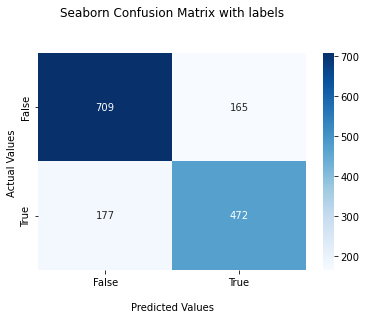

In [140]:
cf_matrix_NB = confusion_matrix(Y_test, Y_NB_pred)

ax = sns.heatmap(cf_matrix_NB, annot=True, cmap='Blues', fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### SVC

In [141]:
final_SVC.fit(X_train, Y_train)

Pipeline(steps=[('vect',
                 Pipeline(steps=[('count',
                                  CountVectorizer(max_features=5000,
                                                  stop_words='english')),
                                 ('tfidf', TfidfTransformer())])),
                ('scaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=1.6666666666666665))])

In [142]:
Y_SVC_pred = final_SVC.predict(X_test)

In [143]:
print("Accuracy score:", accuracy_score(Y_test, Y_SVC_pred))
print("F1-score:", f1_score(Y_test, Y_SVC_pred))

Accuracy score: 0.7774130006565988
F1-score: 0.7177352206494587


In [144]:
print(classification_report(Y_test, Y_SVC_pred))

              precision    recall  f1-score   support

       False       0.78      0.86      0.82       874
        True       0.78      0.66      0.72       649

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523



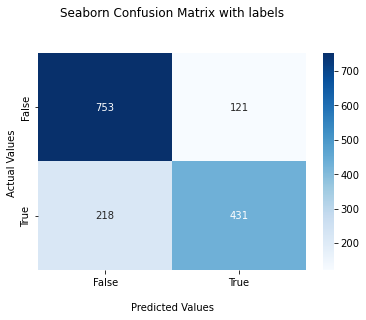

In [145]:
cf_matrix_SVC = confusion_matrix(Y_test, Y_SVC_pred)

ax = sns.heatmap(cf_matrix_SVC, annot=True, cmap='Blues', fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Logistic Regression

In [146]:
final_log.fit(X_train, Y_train)

Pipeline(steps=[('vect',
                 Pipeline(steps=[('count',
                                  CountVectorizer(max_features=5000,
                                                  stop_words='english')),
                                 ('tfidf', TfidfTransformer())])),
                ('scaler', StandardScaler(with_mean=False)),
                ('log', LogisticRegression(C=0.001))])

In [147]:
Y_log_pred = final_log.predict(X_test)

In [148]:
print("Accuracy score:", accuracy_score(Y_test, Y_log_pred))
print("F1-score:", f1_score(Y_test, Y_log_pred))

Accuracy score: 0.783322390019698
F1-score: 0.7299509001636661


In [149]:
print(classification_report(Y_test, Y_log_pred))

              precision    recall  f1-score   support

       False       0.79      0.85      0.82       874
        True       0.78      0.69      0.73       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



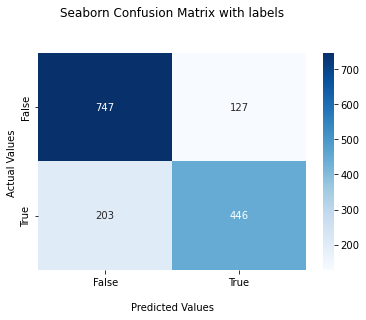

In [150]:
cf_matrix_log = confusion_matrix(Y_test, Y_log_pred)

ax = sns.heatmap(cf_matrix_log, annot=True, cmap='Blues', fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()